## Tutor experiment analysis

Analysis code for the tutor training experiment.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval

sns.set_theme()

In [2]:
df_after_exclusion = pd.read_csv("./data/tutor_experiment/tutor_experiment_exclusion_data.csv", converters={'BmpsActions': literal_eval, 'Actions': literal_eval})
df = pd.read_csv("./data/tutor_experiment/tutor_experiment_full_data.csv", converters={'BmpsActions': literal_eval, 'Actions': literal_eval})
questionnaire_df = pd.read_csv("./data/tutor_experiment/questionnaire.csv")
print(len(df_after_exclusion.groupby("Participant")))
print(list(df_after_exclusion.columns))
print(list(questionnaire_df.columns))
participants = df_after_exclusion["Participant"].unique().tolist()
all_participants = df["Participant"].unique().tolist()
print(len(participants), len(all_participants))

conditions = {
    0: "Control",
    1: "ChoiceTutor",
    2: "DummyTutor"
}

df_after_exclusion["NamedCondition"] = df_after_exclusion.apply(lambda x: conditions[x["Condition"]], axis=1)

questionnaire_df["Accepted"] = questionnaire_df["Participant"].isin(participants)


293
['Unnamed: 0', 'Participant', 'Condition', 'Counterbalance', 'TrialId', 'Score', 'ExpectedScore', 'ClickedScore', 'NumClicks', 'Actions', 'TestEnv', 'OptimalScore', 'ClickAgreement', 'RepeatAgreement', 'StrictRepeatAgreement', 'TermAgreement', 'RepeatClicks', 'BmpsReward', 'BmpsClick', 'BmpsRepeatClicks', 'BmpsActions', 'Cost', 'Tau', 'BmpsGoalStrategy', 'GoalStrategy', 'Excluded']
['Unnamed: 0', 'Participant', 'Condition', 'Counterbalance', 'Language', 'QuizAttempts', 'QuizFailures', 'Bonus', 'Duration', 'Was it necessary to click airports multiple times to achieve a high reward?', 'Which airports should be clicked first?', 'How enjoyable was it to learn strategies in the training environments?', 'How useful do you think the training environments were for you to learn a good strategy?', 'Have you participated this type of planning experiment in the past?', 'Did you try your best to achieve a high reward?', 'What is your age?', 'What gender do you identify with?', 'Any issues with 

## Summary statistics

In [9]:
def parse_gender(x):

    response = x["What gender do you identify with?"]
    if type(response) is str:
        if response.lower()[0] == "f" or response.lower()[0] == "w":
            return True
        else:
            return False
    else:
        #print(response)
        return None

questionnaire_df["Female"] = questionnaire_df.apply(lambda x: parse_gender(x), axis=1)

In [5]:
print("Total responses", len(df)/10, len(questionnaire_df[questionnaire_df["CompleteTrialData"]==True]))
print("Accepted responses", len(df_after_exclusion)/10)
print("Exclusions", len(df)/10 - len(df_after_exclusion)/10)
print("Median duration", questionnaire_df[questionnaire_df["CompleteTrialData"]==True]["Duration"].median()/60)
print("Average bonus", questionnaire_df[questionnaire_df["CompleteTrialData"]==True]["Bonus"].mean())
print("Average age", questionnaire_df["What is your age?"].mean())
print("Female participants", questionnaire_df["Female"].sum())

Total responses 330.0 330
Accepted responses 293.0
Exclusions 37.0
Median duration 40.47608799166667
Average bonus 0.9123030303030303
Average age 28.196374622356494
Female participants 164


Text(-0.45, 21, 'Tutor strategy')

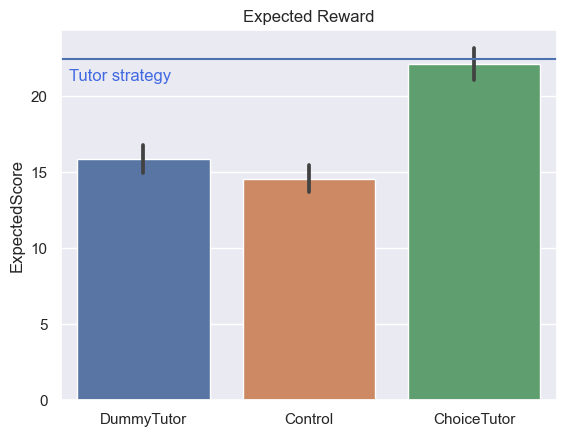

In [6]:
g= sns.barplot(x = "NamedCondition", y = "ExpectedScore", data=df_after_exclusion)
avg_bmps = df_after_exclusion["BmpsReward"].mean()

g.axhline(avg_bmps)
g.set_title("Expected Reward")
g.set_xlabel("")
g.text(-0.45, 21, 'Tutor strategy', c="royalblue")

In [7]:
print(df_after_exclusion[["NamedCondition", "ExpectedScore", "GoalStrategy", "ClickAgreement", "TermAgreement", "RepeatAgreement"]].groupby("NamedCondition").agg(['mean', 'std']).round(2).to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{ExpectedScore} & \multicolumn{2}{r}{GoalStrategy} & \multicolumn{2}{r}{ClickAgreement} & \multicolumn{2}{r}{TermAgreement} & \multicolumn{2}{r}{RepeatAgreement} \\
 & mean & std & mean & std & mean & std & mean & std & mean & std \\
NamedCondition &  &  &  &  &  &  &  &  &  &  \\
\midrule
ChoiceTutor & 22.100000 & 16.840000 & 0.690000 & 0.460000 & 0.330000 & 0.180000 & 0.870000 & 0.180000 & 0.180000 & 0.250000 \\
Control & 14.570000 & 14.340000 & 0.180000 & 0.380000 & 0.160000 & 0.160000 & 0.890000 & 0.130000 & 0.080000 & 0.200000 \\
DummyTutor & 15.870000 & 15.560000 & 0.460000 & 0.500000 & 0.260000 & 0.190000 & 0.840000 & 0.220000 & 0.090000 & 0.200000 \\
\bottomrule
\end{tabular}



In [14]:
def iqr(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    return q3 - q1

print(df_after_exclusion[["NamedCondition", "ExpectedScore", "ClickAgreement", "TermAgreement", "RepeatAgreement"]].groupby("NamedCondition").agg(["median", iqr]).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{ExpectedScore} & \multicolumn{2}{r}{ClickAgreement} & \multicolumn{2}{r}{TermAgreement} & \multicolumn{2}{r}{RepeatAgreement} \\
 & median & iqr & median & iqr & median & iqr & median & iqr \\
NamedCondition &  &  &  &  &  &  &  &  \\
\midrule
ChoiceTutor & 22.670000 & 26.140000 & 0.320000 & 0.240000 & 0.940000 & 0.050000 & 0.000000 & 0.330000 \\
Control & 11.460000 & 19.680000 & 0.120000 & 0.250000 & 0.930000 & 0.070000 & 0.000000 & 0.000000 \\
DummyTutor & 14.110000 & 23.340000 & 0.250000 & 0.300000 & 0.920000 & 0.090000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}



In [15]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
tmp = df_after_exclusion.groupby("Participant").median()[["Condition", "GoalStrategy"]]
tmp.loc[tmp["GoalStrategy"]==0.5, "GoalStrategy"]=0
print(tmp.groupby("Condition").agg(["mean"])["GoalStrategy"])
counts = tmp.groupby("Condition").sum()["GoalStrategy"].astype(int).tolist()
nobs = tmp.groupby("Condition").count()["GoalStrategy"].tolist()
comparisons = ((1, 0), (1, 2))
stats, pvals = [], []
for comp in comparisons:  
    count = np.array([counts[comp[0]], counts[comp[1]]])
    nob = np.array([nobs[comp[0]], nobs[comp[1]]])
    stat, pval = proportions_ztest(count, nob)
    stats.append(stat)
    pvals.append(pval)

p_adjusted = multipletests(pvals, method="fdr_bh")[1]
print(pvals)
print(p_adjusted)
for comp, stat, pval, p_new in zip(comparisons, stats, pvals, p_adjusted):
    print(f"Z-test between condition {conditions[comp[0]]} and {conditions[comp[1]]}: z={np.round(stat, 3)}, p={np.round(pval, 4)}, corrected={np.round(p_new, 4)}")

TypeError: setting an array element with a sequence.

In [16]:
df_after_exclusion.groupby(["NamedCondition"]).agg(["mean", "median"])[["ExpectedScore", "ClickAgreement", "TermAgreement", "RepeatAgreement"]].round(2)

TypeError: complex() first argument must be a string or a number, not 'list'

## Analyze strategies

In [ ]:
# Subgoal planning
# Find out how many participants start with a goal 
# Find out how many participants identify the optimal goal

# Subgoal planning
# Find out how many participants start plan the higher variance nodes 
# Find out how many participants plan the lower variance nodes

# Repeats
# Find out how many participants repeat goals when they are close

In [25]:
from src.utils.distributions import Normal
import json 
from src.utils.mouselab_PAR import MouselabPar
import tqdm
from copy import deepcopy

MYOPIC_MODE = "old"
ENV_PATH = "data/environments/"
d0 = Normal(0,5)
d1 = Normal(0,10)
d2 = Normal(0,20)
node_types = [d0, 
    d0, d0, d0, d0, d0, d0, d0, d1, d1, d1, d1, d1, d1, d1, d2, 
    d0, d0, d0, d0, d0, d0, d0, d1, d1, d1, d1, d1, d1, d1, d2, 
    d0, d0, d0, d0, d0, d0, d0, d1, d1, d1, d1, d1, d1, d1, d2, 
    d0, d0, d0, d0, d0, d0, d0, d1, d1, d1, d1, d1, d1, d1, d2]
TREE = [[1, 16, 31, 46], [2, 3, 4, 5], [6], [6], [7], [7], [8], [8], [9, 10, 11, 12], [13], [13], [14], [14], [15], [15], [], [17, 18, 19, 20], [21], [21], [22], [22], [23], [23], [24, 25, 26, 27], [28], [28], [29], [29], [30], [30], [], [32, 33, 34, 35], [36], [36], [37], [37], [38], [38], [39, 40, 41, 42], [43], [43], [44], [44], [45], [45], [], [47, 48, 49, 50], [51], [51], [52], [52], [53], [53], [54, 55, 56, 57], [58], [58], [59], [59], [60], [60], []]
term_click = len(TREE)

level_1_clicks = [i for i,x in enumerate(node_types) if x.sigma==5 and i != 0]
level_2_clicks = [i for i,x in enumerate(node_types) if x.sigma==10 and i != 0]
level_3_clicks = [i for i,x in enumerate(node_types) if x.sigma==20 and i != 0]

def load_env(counterbalance, cost, tau, trial_id):
    if counterbalance < 10:
        counterbalance = "0"+str(counterbalance)
    filename = f"{str(counterbalance)}_{str(cost)[2:]}_{str(tau)[2:]}.json"
    data = json.load(open(ENV_PATH+"/experiment_instances/4_60_json/"+filename))
    for trial in data:
        if int(trial["trial_id"]) is int(trial_id):
            samples = trial["samples"]
            samples = {int(k):v for k,v in samples.items()}
            rewards = trial["stateRewards"]
            return samples, rewards

def get_optimal_actions(state_rewards, clicks, samples, cost, tau):
    expected_reward,  available_actions = get_voc(state_rewards, clicks, samples, cost, tau)
    max_reward = max(expected_reward)
    optimal_clicks = [available_actions[i] for i in range(len(available_actions)) if np.isclose(expected_reward[i], max_reward, atol=.05, rtol=0)]
    return optimal_clicks

def get_voc(state_rewards, clicks, samples, cost, tau):
    ground_truth = [0] + state_rewards[1:]
    env = MouselabPar(TREE, tuple(node_types), ground_truth=ground_truth, cost=cost, repeat_cost=cost, tau=tau, samples=samples, myopic_mode=MYOPIC_MODE)
    for click in clicks:
        env._step(int(click))
    available_actions = list(env.actions(env._state))
    assert len(available_actions) == 61
    expected_reward = [sum(env.myopic_action_feature(a)) for a in available_actions]
    return expected_reward, available_actions

### Goal planning

In [9]:
# How many participants start with goal planning
goal_start = {0: [], 1: [], 2: []}
for i in range(len(df_after_exclusion)):
    row = df_after_exclusion.iloc[i]
    if (len(row["Actions"])>0) and (int(row["Actions"][0]) in level_3_clicks):
        goal_start[row["Condition"]].append(1)
    else:
        goal_start[row["Condition"]].append(0)
print([(k, np.mean(v)) for k,v in goal_start.items()])

[(0, 0.23118279569892472), (1, 0.8408163265306122), (2, 0.546078431372549)]


In [31]:
# starting actions per group
from collections import Counter
goal_start = {0: [], 1: [], 2: []}
for i in range(len(df_after_exclusion)):
    row = df_after_exclusion.iloc[i]
    if (len(row["Actions"])>0):
        if int(row["Actions"][0]) in level_1_clicks:
            goal_start[row["Condition"]].append(1)
        elif int(row["Actions"][0]) in level_2_clicks:
            goal_start[row["Condition"]].append(2)
        elif int(row["Actions"][0]) in level_3_clicks:
            goal_start[row["Condition"]].append(3)
        else:
            assert False
    else:
        goal_start[row["Condition"]].append(0)
for condition, start_clicks in goal_start.items():
    print(condition, Counter(start_clicks))

0 Counter({1: 596, 3: 215, 2: 111, 0: 8})
1 Counter({3: 824, 1: 107, 2: 35, 0: 14})
2 Counter({3: 557, 1: 269, 2: 145, 0: 49})


In [34]:
596 / (215+111+8+596)

0.6408602150537634

In [38]:
# Exact goal strategy
goal_selection_exact = {0: [], 1: [], 2: []}
errors = {0: [], 1: [], 2: []}
for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if (len(row["Actions"])>0) and (int(row["Actions"][0]) in level_3_clicks):
        cost = row["Cost"]
        tau = row["Tau"]
        counterbalance = row["Counterbalance"]
        trial_id = row["TrialId"]
        samples, rewards = load_env(counterbalance, cost, tau, trial_id)
        previous_actions = []
        correct_actions = []
        for j in range(len(row["Actions"])):
            current_action = int(row["Actions"][j])
            optimal_actions = get_optimal_actions(rewards, previous_actions, samples, cost, tau)
            previous_actions.append(current_action)
            if all([int(optimal_action) in level_3_clicks for optimal_action in optimal_actions]):
                if current_action in optimal_actions:
                    correct_actions.append(1)
                else:
                    correct_actions.append(0)
                    errors[row["Condition"]].append("Incorrect goal")
            else:
                if current_action not in level_3_clicks:
                    correct_actions.append(1)
                else:
                    correct_actions.append(0)
                    errors[row["Condition"]].append("Overplanning")
                break
        assert len(correct_actions) > 0, correct_actions
        goal_selection_exact[row["Condition"]].append(np.mean(correct_actions))
    else:
        goal_selection_exact[row["Condition"]].append(0)
        errors[row["Condition"]].append("No goal planning")
print([(k, np.mean(v)) for k,v in goal_selection_exact.items()])
   

100%|██████████| 2930/2930 [04:39<00:00, 10.49it/s]

[(0, 0.15498463901689707), (1, 0.5668646744412051), (2, 0.3958590102707749)]


In [40]:
for condition, error in errors.items():
    print(condition, Counter(error), len(error), len(goal_selection_exact[condition]))

0 Counter({'No goal planning': 715, 'Overplanning': 160, 'Incorrect goal': 54}) 929 930
1 Counter({'Overplanning': 671, 'No goal planning': 156, 'Incorrect goal': 100}) 927 980
2 Counter({'No goal planning': 463, 'Overplanning': 360, 'Incorrect goal': 100}) 923 1020


In [41]:
715 / 930, 463 / 1020, 671 / 980

(0.7688172043010753, 0.453921568627451, 0.6846938775510204)

In [39]:
# Optimal goal identification
# Check if BMPS would select a goal click
# Check if participants would also select a goal click
goal_selection = {0: [], 1: [], 2: []}
for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if (len(row["Actions"])>0) and (int(row["Actions"][0]) in level_3_clicks):
        cost = row["Cost"]
        tau = row["Tau"]
        counterbalance = row["Counterbalance"]
        trial_id = row["TrialId"]
        samples, rewards = load_env(counterbalance, cost, tau, trial_id)
        previous_actions = []
        correct_actions = []
        for j in range(len(row["Actions"])):
            current_action = int(row["Actions"][j])
            optimal_actions = get_optimal_actions(rewards, previous_actions, samples, cost, tau)
            previous_actions.append(current_action)
            if all([int(optimal_action) in level_3_clicks for optimal_action in optimal_actions]):
                if current_action in level_3_clicks:
                    correct_actions.append(1)
                else:
                    correct_actions.append(0)
                    break
            else:
                break
        assert len(correct_actions) > 0, correct_actions
        goal_selection[row["Condition"]].append(np.mean(correct_actions))
    else:
        goal_selection[row["Condition"]].append(0)
   

100%|██████████| 2930/2930 [04:04<00:00, 11.98it/s]


In [44]:
print([(k, np.mean(v)) for k,v in goal_start.items()])
print([(k, np.mean(v)) for k,v in goal_selection.items()])

[(0, 0.23118279569892472), (1, 0.8408163265306122), (2, 0.546078431372549)]
[(0, 0.2189784946236559), (1, 0.8267346938775509), (2, 0.5278267973856209)]


### Intermediate planning

In [44]:
# Are level 2 clicks considered at the right time?
subgoal_planning = {0: [], 1: [], 2: []}
errors = {0: [], 1: [], 2: []}
for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if len(row["Actions"])==0:
        subgoal_planning[row["Condition"]].append(0)
    else:
        level_3_planned = False
        level_1_planned = False
        # Track actions before level 2 clicks
        for j in range(len(row["Actions"])):
            if int(row["Actions"][j]) in level_3_clicks:
                level_3_planned = True
            elif int(row["Actions"][j]) in level_1_clicks:
                level_1_planned = True
            else:
                break
        # Check if level 2 clicks are planned after level 3 and before level 1
        if int(row["Actions"][j]) in level_2_clicks:
            if level_3_planned and (not level_1_planned):
                subgoal_planning[row["Condition"]].append(1)
            else:
                subgoal_planning[row["Condition"]].append(0)
                if not level_3_planned:
                    errors[row["Condition"]].append("Level 2 before level 3")
                else:
                    errors[row["Condition"]].append("Level 2 after level 1")
        else:
            subgoal_planning[row["Condition"]].append(0)
            errors[row["Condition"]].append("No level 2")
print([(k, np.mean(v)) for k,v in subgoal_planning.items()])
for condition, error in errors.items():
    print(condition, Counter(error), len(error), len(subgoal_planning[condition]))

  0%|          | 0/2930 [00:00<?, ?it/s]

100%|██████████| 2930/2930 [00:00<00:00, 10439.83it/s]

[(0, 0.15376344086021507), (1, 0.6693877551020408), (2, 0.3696078431372549)]
0 Counter({'Level 2 before level 3': 642, 'Level 2 after level 1': 94, 'No level 2': 43}) 779 930
1 Counter({'Level 2 after level 1': 189, 'Level 2 before level 3': 107, 'No level 2': 14}) 310 980
2 Counter({'Level 2 before level 3': 332, 'Level 2 after level 1': 193, 'No level 2': 69}) 594 1020


In [45]:
642 / 930, 189 / 980, 332 / 1020

(0.6903225806451613, 0.19285714285714287, 0.3254901960784314)

In [73]:
# Proportion of correctly investigated level 2 clicks
subgoal_selection = {0: [], 1: [], 2: []}

for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if len(row["Actions"])==0:
        subgoal_selection[row["Condition"]].append(0)
    else:
        cost = row["Cost"]
        tau = row["Tau"]
        counterbalance = row["Counterbalance"]
        trial_id = row["TrialId"]

        correct_actions = []
        samples, rewards = load_env(counterbalance, cost, tau, trial_id)
        # Check if selected level 2 clicks are better than alternative level 2 clicks
        for k in range(len(row["Actions"])):
            next_action = int(row["Actions"][k])
            if next_action in level_2_clicks:
                previous_actions = [int(a) for a in row["Actions"][:k][:-1]]
                expected_reward, available_actions = get_voc(rewards, previous_actions, deepcopy(samples), cost, tau)
                max_level_2_reward = max([expected_reward[action] for action in level_2_clicks])
                optimal_level_2_actions = [action for action in level_2_clicks if np.isclose(expected_reward[action], max_level_2_reward, atol=.05, rtol=0)]
                if next_action in optimal_level_2_actions:
                    correct_actions.append(1)
                else:
                    correct_actions.append(0)
        if len(correct_actions) > 0:
            subgoal_selection[row["Condition"]].append(np.mean(correct_actions))
        else:
            subgoal_selection[row["Condition"]].append(0)
print([(k, np.mean(v)) for k,v in subgoal_planning.items()])


100%|██████████| 2930/2930 [24:14<00:00,  2.01it/s]  


In [74]:
print([(k, np.mean(v)) for k,v in subgoal_planning.items()])
print([(k, np.mean(v)) for k,v in subgoal_selection.items()])

[(0, 0.15376344086021507), (1, 0.6693877551020408), (2, 0.3696078431372549)]
[(0, 0.2609446333132156), (1, 0.40908883938556895), (2, 0.3090276027034578)]


### Immediate nodes

In [46]:
# Level 1 selection at the right time?
subgoal_planning = {0: [], 1: [], 2: []}
errors = {0: [], 1: [], 2: []}
for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if len(row["Actions"])==0:
        subgoal_planning[row["Condition"]].append(0)
    else:
        level_3_planned = False
        level_2_planned = False
        # Track actions before level 1 clicks
        for j in range(len(row["Actions"])):
            if int(row["Actions"][j]) in level_3_clicks:
                level_3_planned = True
            elif int(row["Actions"][j]) in level_2_clicks:
                level_2_planned = True
            else:
                break
        # Check if level 1 clicks are planned after level 2 and level 3
        if int(row["Actions"][j]) in level_1_clicks:
            if level_3_planned and level_2_planned:
                subgoal_planning[row["Condition"]].append(1)
            else:
                subgoal_planning[row["Condition"]].append(0)
                if not level_3_planned:
                    errors[row["Condition"]].append("Level 1 before level 3")
                else:
                    errors[row["Condition"]].append("Level 1 before level 2")
        else:
            subgoal_planning[row["Condition"]].append(0)
            errors[row["Condition"]].append("No level 1")
print([(k, np.mean(v)) for k,v in subgoal_planning.items()])
for condition, error in errors.items():
    print(condition, Counter(error), len(error), len(subgoal_planning[condition]))

100%|██████████| 2930/2930 [00:00<00:00, 10172.47it/s]

[(0, 0.17311827956989248), (1, 0.6908163265306122), (2, 0.40784313725490196)]
0 Counter({'Level 1 before level 3': 681, 'Level 1 before level 2': 60, 'No level 1': 20}) 761 930
1 Counter({'Level 1 before level 2': 158, 'Level 1 before level 3': 118, 'No level 1': 13}) 289 980
2 Counter({'Level 1 before level 3': 319, 'Level 1 before level 2': 136, 'No level 1': 100}) 555 1020


In [47]:
681 / 930, 158 / 980, 319 / 1020

(0.7322580645161291, 0.16122448979591836, 0.3127450980392157)

In [10]:
# subsub selection
subgoal_selection = {0: [], 1: [], 2: []}

for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if len(row["Actions"])==0:
        subgoal_selection[row["Condition"]].append(0)
    else:
        cost = row["Cost"]
        tau = row["Tau"]
        counterbalance = row["Counterbalance"]
        trial_id = row["TrialId"]

        samples, rewards = load_env(counterbalance, cost, tau, trial_id)
        correct_actions = []
        for k in range(len(row["Actions"])):
            next_action = int(row["Actions"][k])
            if next_action in level_1_clicks:
                previous_actions = [int(a) for a in row["Actions"][:k][:-1]]
                expected_reward, available_actions = get_voc(rewards, previous_actions, deepcopy(samples), cost, tau)
                max_level_1_reward = max([expected_reward[action] for action in level_1_clicks])
                optimal_level_1_actions = [action for action in level_1_clicks if np.isclose(expected_reward[action], max_level_1_reward, atol=.05, rtol=0)]
                if next_action in optimal_level_1_actions:
                    correct_actions.append(1)
                else:
                    correct_actions.append(0)
        if len(correct_actions) > 0:
            subgoal_selection[row["Condition"]].append(np.mean(correct_actions))
        else:
            subgoal_selection[row["Condition"]].append(0)

100%|██████████| 2930/2930 [19:36<00:00,  2.49it/s] 


In [11]:
print([(k, np.mean(v)) for k,v in subgoal_planning.items()])
print([(k, np.mean(v)) for k,v in subgoal_selection.items()])

[(0, 0.17311827956989248), (1, 0.6908163265306122), (2, 0.40784313725490196)]
[(0, 0.2686396316988685), (1, 0.4800113234361773), (2, 0.36211324457875327)]


In [20]:
# Proportion of clicks in different levels
def count_levels(actions):
    level_1 = 0
    level_2 = 0
    level_3 = 0
    for action in actions:
        action = int(action)
        if action in level_1_clicks:
            level_1 += 1
        elif action in level_2_clicks:
            level_2 += 1
        elif action in level_3_clicks:
            level_3 += 1
        elif action == term_click:
            pass
        else:
            assert False, action
    return level_1, level_2, level_3

click_levels = {0: [], 1: [], 2: [], 3: []}
for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    actions = row["Actions"]
    optimal_actions = row["BmpsActions"]
    
    level_1, level_2, level_3 = count_levels(actions)
    click_levels[row["Condition"]].append([level_1, level_2, level_3])

    level_1, level_2, level_3 = count_levels(optimal_actions)
    click_levels[3].append([level_1, level_2, level_3])

100%|██████████| 2930/2930 [00:00<00:00, 10552.64it/s]


In [22]:
for condition in click_levels.keys():
    print(condition, np.mean(click_levels[condition], axis=0))

0 [9.01827957 8.83978495 3.02043011]
1 [ 9.4122449  10.29285714  5.96734694]
2 [6.1127451  6.83333333 4.01372549]
3 [ 7.06996587 10.03276451  3.31331058]


In [28]:
# To what extend do participants plan in the optimal level

correct_level = {0: [], 1: [], 2: []}

def get_level(action):
    if action in level_1_clicks:
        return 1
    elif action in level_2_clicks:
        return 2
    elif action in level_3_clicks:
        return 3
    else:
        return 0

for i in tqdm.tqdm(range(len(df_after_exclusion))):
    row = df_after_exclusion.iloc[i]
    if len(row["Actions"])==0:
        correct_level[row["Condition"]].append(0)
    else:
        cost = row["Cost"]
        tau = row["Tau"]
        counterbalance = row["Counterbalance"]
        trial_id = row["TrialId"]

        samples, rewards = load_env(counterbalance, cost, tau, trial_id)
        correct_actions = []
        for k in range(len(row["Actions"])):
            next_action = int(row["Actions"][k])
            next_level = get_level(next_action)
            previous_actions = [int(a) for a in row["Actions"][:k][:-1]]
            optimal_actions = get_optimal_actions(rewards, previous_actions, deepcopy(samples), cost, tau)
            optimal_levels = np.unique([get_level(a) for a in optimal_actions])
            if next_level in optimal_levels:
                correct_actions.append(1)
            else:
                correct_actions.append(0)
        if len(correct_actions) > 0:
            correct_level[row["Condition"]].append(np.mean(correct_actions))
        else:
            correct_level[row["Condition"]].append(0)

100%|██████████| 2930/2930 [59:25<00:00,  1.22s/it]   


In [29]:
print([(k, np.mean(v)) for k,v in correct_level.items()])

[(0, 0.2919030408898267), (1, 0.5584669530910892), (2, 0.44027873955101876)]
